# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2024-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Actividad 05: Limpieza de datos</center></h1>

Esta actividad busca aplicar los conocimientos en transformación de datos para contestar algunas preguntas.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook y los archivos generados en un único archivo .zip, al módulo de la Actividad 05 en Canvas. Entregas posteriores al cierre de la actividad serán evaluadas con nota 1.0.</b>

## Actividad

Para esta actividad usaremos una base de datos obtenida de AirBnb que hemos bajado para usted. La base está dispobible en la carpeta `data` y el archivo se llama `listings.csv`.

## Rúbrica

- Si han logrado hasta el punto 3: 4.0
- Si han logrado hasta el punto 5: 5.0
- Si han logrado todo: 7.0

In [1]:
# librerías necesarias para el ejercicio
import pandas as pd

## 1. Limpieza - datos relevantes

A continuación use las celdas para leer y transformar en un único DataFrame los datos que están en el archivo `listings.csv`.

Lea el archivo y liste sus columnas.

In [2]:
df0 = pd.read_csv('data\listings.csv')
df0.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

Para este trabajo, estaremos interesados sólo en las siguientes columnas:

['id',	'last_scraped',	'name',	'summary',	'description', 'city', 'state', 'country_code',	'latitude',	'longitude',	'room_type',	'accommodates',	'bathrooms',	'bedrooms',	'price',	'cleaning_fee', 'review_scores_rating',	'cancellation_policy']

Limpie los datos crudos para crear un DataFrame que sólo contenga estas columnas de información.

In [3]:
df = df0.drop(columns=['listing_url','experiences_offered','neighborhood_overview','instant_bookable','instant_bookable', 'is_business_travel_ready', 
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms','transit', 'access', 'interaction',
       'house_rules', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified','scrape_id','guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights','weekly_price',
       'monthly_price', 'security_deposit','property_type',
       'minimum_minimum_nights', 'maximum_minimum_nights','bed_type', 'amenities',
       'minimum_maximum_nights', 'maximum_maximum_nights', 'market', 'smart_location',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60','zipcode',
       'availability_90', 'availability_365', 'calendar_last_scraped','review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','neighbourhood_group_cleansed',
       'review_scores_communication', 'review_scores_location', 'country','square_feet',
       'review_scores_value', 'requires_license', 'license','notes', 'street',
       'jurisdiction_names', 'reviews_per_month','is_location_exact', 'beds',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review','neighbourhood', 'neighbourhood_cleansed',
       'last_review',])

In [4]:
# revisamos nuestro nuevo dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15984 entries, 0 to 15983
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15984 non-null  int64  
 1   last_scraped          15984 non-null  object 
 2   name                  15973 non-null  object 
 3   summary               14796 non-null  object 
 4   space                 9470 non-null   object 
 5   description           15109 non-null  object 
 6   city                  15910 non-null  object 
 7   state                 15925 non-null  object 
 8   country_code          15984 non-null  object 
 9   latitude              15984 non-null  float64
 10  longitude             15984 non-null  float64
 11  room_type             15984 non-null  object 
 12  accommodates          15984 non-null  int64  
 13  bathrooms             15937 non-null  float64
 14  bedrooms              15951 non-null  float64
 15  price              

## 2. Limpieza - datos duplicados

Ahora asegure que en las filas de su DataFrame no existan datos duplicados. En caso de existir datos duplicados, dejar la primera aparición de los datos en el CSV como dato final. ¿Cuántos datos duplicados encontró?

In [5]:
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15970 entries, 0 to 15983
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15970 non-null  int64  
 1   last_scraped          15970 non-null  object 
 2   name                  15959 non-null  object 
 3   summary               14782 non-null  object 
 4   space                 9460 non-null   object 
 5   description           15095 non-null  object 
 6   city                  15896 non-null  object 
 7   state                 15911 non-null  object 
 8   country_code          15970 non-null  object 
 9   latitude              15970 non-null  float64
 10  longitude             15970 non-null  float64
 11  room_type             15970 non-null  object 
 12  accommodates          15970 non-null  int64  
 13  bathrooms             15923 non-null  float64
 14  bedrooms              15937 non-null  float64
 15  price              

Revisando ambas salidas vemos que había 14 registros eliminados por duplicidad.

## 3. Limpieza de texto y transformación

En la columna `price` está como texto el precio de cada una de las publicaciones. Corrija esos datos para contestar: ¿Cuál es el precio promedio de arriendos de AirBnb en esta base de datos?

In [6]:
# debemos transformar el texto para eliminar los símbolos innecesarios y transformar a un número
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].astype('float')

C:\Users\rodri\AppData\Local\Temp\ipykernel_17552\1582348827.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


In [7]:
df['price'].describe()

count    1.597000e+04
mean     9.094725e+04
std      1.968204e+06
min      0.000000e+00
25%      1.879800e+04
50%      3.023600e+04
75%      4.495200e+04
max      2.248781e+08
Name: price, dtype: float64

In [8]:
df['price'].mean()

90947.24953036944

## 4. Variables categóricas

La variable `cancellation_policy` corresponde a una variable categórica. Identifique qué categorías tiene esta columna.

In [9]:
categorias_orig = df['cancellation_policy'].unique()
categorias_orig

array(['moderate', 'flexible', 'strict_14_with_grace_period',
       'super_strict_60', 'super_strict_30'], dtype=object)

## 5. Cambios de categoría

Para nuetro análisis, sólo trabajaremos con las siguientes categorías: `moderate`,`flexible`,`strict`. Transforme la columna `cancellation_policy` para que se adapte a sólo estos tres posibles valores. Si cree que no es obvia la transformación, explique cómo decisió mapear cada categoría original a las categorías finales. Verifique que el DataFrame final sólo tiene esas categorías y conteste: ¿Cuántas publicaciones tenían una categoría `flexible`?

In [10]:
# Lista de categorías finales
cats_real=['flexible', 'moderate', 'strict']

# Revisar registros que están en la lista de categorías deseadas
df['cancellation_policy'].isin(cats_real).sum()

13763

In [11]:
# mapeo de categorías originales y finales
map_cats = {'strict_14_with_grace_period':'strict',
          'super_strict_60':'strict',
          'super_strict_30':'strict',
             'flexible':'flexible',
         'moderate':'moderate'}

df['cancellation_policy'] = df['cancellation_policy'].map(map_cats)

In [12]:
df['cancellation_policy'].unique()

array(['moderate', 'flexible', 'strict'], dtype=object)

In [13]:
df['cancellation_policy'].isin(['flexible']).sum()

10239

## 6. Valores fuera de rango

Muchas veces las variables pueden tener valores furea de rango. Revise los datos de la columna `bedrooms`. ¿Encuentra que los valores están todos en un rango razonable? Si no lo están, revise el dato y verifique si hace sentido o no.

In [14]:
df['bedrooms'].describe()

count    15937.000000
mean         1.371463
std          1.107459
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: bedrooms, dtype: float64

Nos aparece que hay al menos una publicación con 0 piezas en arriendo y otra con 50. Sería extraño contar con un arriendo que no tiene piezas y suena extraño uno con tantas. Revisemos esos valores.

In [15]:
df[df['bedrooms']==0]

,id,last_scraped,name,summary,space,description,city,state,country_code,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,review_scores_rating,cancellation_policy
439,2419113,2020-06-22,Departamento para 2 personas,"Estudio amoblado , cama matrimonial , baño pri...","Apartamento capacidad para 2 personas , comple...","Estudio amoblado , cama matrimonial , baño pri...",Santiago,Región Metropolitana de Santiago de Chile,CL,-33.43967,-70.65694,Entire home/apt,2,1.0,0.0,40865.0,NaN,85.0,strict
506,2837601,2020-06-23,"el colorado, edificio monteblanco","Excelente recién remodelado, tipo loft con 2 a...",Ski in/out 4 px Apt. Fully equipped at El Colo...,"Excelente recién remodelado, tipo loft con 2 a...",Santiago,Región Metropolitana,CL,-33.34531,-70.29464,Entire home/apt,4,1.0,0.0,163438.0,"$24,516.00",85.0,strict
511,2882770,2020-06-22,Apto. Studio Santiago Centro,Excelente ubicación del apartamento tipo Studi...,NaN,Excelente ubicación del apartamento tipo Studi...,Santiago,Región Metropolitana,CL,-33.44078,-70.65774,Entire home/apt,2,1.0,0.0,49038.0,NaN,NaN,flexible
567,3267803,2020-06-25,Departamento Estudio 1203,HERMOSO APARTAMENTO ESTUDIO AMOBLADO Y EQUIPAD...,"Un ambiente , muy comodo cuenta con refrigerad...",HERMOSO APARTAMENTO ESTUDIO AMOBLADO Y EQUIPAD...,Santiago,Región Metropolitana,CL,-33.42568,-70.61553,Entire home/apt,2,1.0,0.0,33606.0,$0.00,91.0,flexible
573,3330669,2020-06-21,Downtown Santiago 2B/2B Modern Flat,"Whether you are a couple, a family, a group of...","Modern, comfy, cozy and perfect location(safe ...","Whether you are a couple, a family, a group of...",Santiago,Santiago Metropolitan Region,CL,-33.45110,-70.65566,Entire home/apt,4,0.0,0.0,38413.0,"$12,260.00",81.0,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15918,43569457,2020-06-22,HABITACION PRIVADA 1 baño privado,NaN,NaN,NaN,Santiago,Región Metropolitana,CL,-33.43969,-70.65204,Private room,6,1.0,0.0,22884.0,"$8,000.00",NaN,flexible
15921,43579692,2020-06-22,habitación Privada 1 baño privado,NaN,NaN,NaN,Santiago,Región Metropolitana,CL,-33.43889,-70.65055,Private room,2,0.5,0.0,17163.0,"$4,000.00",NaN,strict
15926,43588797,2020-06-26,Habitacion y baño privado Parque Araucano / ex...,NaN,NaN,NaN,Las Condes,Región Metropolitana,CL,-33.40461,-70.57301,Private room,1,1.0,0.0,14676.0,NaN,NaN,flexible
15970,43834779,2020-06-21,Plaza de Armas 743,Lindo departamento Ubicado en zona céntrica de...,NaN,Lindo departamento Ubicado en zona céntrica de...,Santiago,Región Metropolitana,CL,-33.43899,-70.65068,Entire home/apt,2,1.0,0.0,27788.0,"$7,000.00",NaN,strict


Vemos que en este caso parece haber errores en la columna de `bedrooms` pues la descripción en todos esto habla de al menos una pieza disponible. Veamos ahora el caso con 50.

In [16]:
df[df['bedrooms']==50]

,id,last_scraped,name,summary,space,description,city,state,country_code,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,price,cleaning_fee,review_scores_rating,cancellation_policy
15878,43389813,2020-06-22,"Hotel Brasilia, La capital del barrio Brasil",El Hotel Brasilia se encuentra a 5 km del Pati...,NaN,El Hotel Brasilia se encuentra a 5 km del Pati...,Santiago,Región Metropolitana,CL,-33.43831,-70.66847,Private room,2,50.0,50.0,67836.0,NaN,NaN,flexible


Vemos que en esta caso es un hotel, que bien puede tener 50 piezas a arrendar, por lo que podría no ser un error.

Otra forma de ver los puntos que son `outlier` es usando boxplots.

<Axes: >

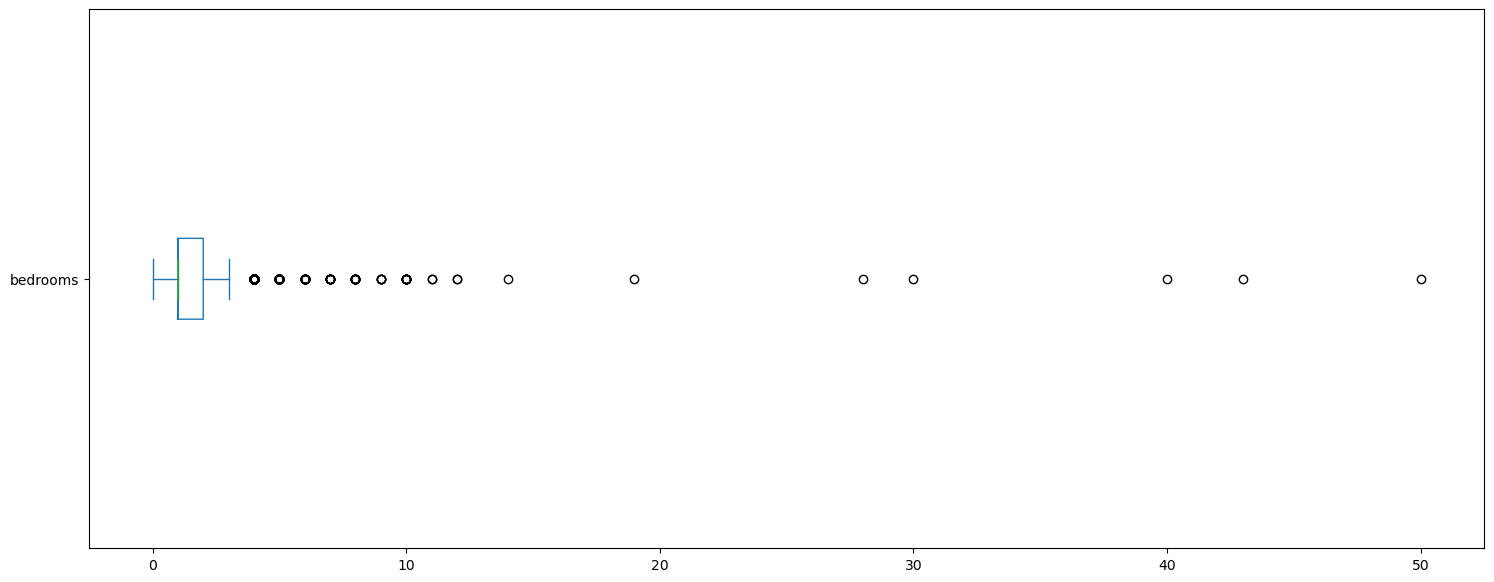

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,7))
df['bedrooms'].plot.box(notch ='True', vert = 0)